In [2]:
#Linear Discriminant Analysis

In [3]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#Import dataset
dataset = pd.read_csv("/content/Wine-211105-185251.csv")

In [7]:
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [9]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [10]:
dataset.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [12]:
X = dataset.iloc[: ,:-1].values
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [14]:
y = dataset.iloc[: , -1].values

In [15]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [16]:
#split the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
X_train

array([[1.371e+01, 1.860e+00, 2.360e+00, ..., 1.110e+00, 4.000e+00,
        1.035e+03],
       [1.388e+01, 5.040e+00, 2.230e+00, ..., 5.800e-01, 1.330e+00,
        4.150e+02],
       [1.229e+01, 1.410e+00, 1.980e+00, ..., 1.230e+00, 2.740e+00,
        4.280e+02],
       ...,
       [1.438e+01, 1.870e+00, 2.380e+00, ..., 1.200e+00, 3.000e+00,
        1.547e+03],
       [1.269e+01, 1.530e+00, 2.260e+00, ..., 9.600e-01, 2.060e+00,
        4.950e+02],
       [1.234e+01, 2.450e+00, 2.460e+00, ..., 8.000e-01, 3.380e+00,
        4.380e+02]])

In [18]:
y_train

array([1, 3, 2, 2, 3, 1, 1, 1, 3, 1, 1, 2, 3, 2, 1, 3, 2, 1, 3, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 3, 2, 2, 2, 1, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 2,
       1, 2, 3, 3, 2, 3, 2, 2, 2, 1, 1, 3, 1, 3, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 3, 2, 2, 2, 3, 3, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 3, 2, 1,
       2, 1, 3, 1, 1, 2, 1, 1, 3, 2, 1, 3, 3, 1, 1, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 3, 1, 2, 2, 1, 2, 2])

In [19]:
X_test

array([[1.364000e+01, 3.100000e+00, 2.560000e+00, 1.520000e+01,
        1.160000e+02, 2.700000e+00, 3.030000e+00, 1.700000e-01,
        1.660000e+00, 5.100000e+00, 9.600000e-01, 3.360000e+00,
        8.450000e+02],
       [1.421000e+01, 4.040000e+00, 2.440000e+00, 1.890000e+01,
        1.110000e+02, 2.850000e+00, 2.650000e+00, 3.000000e-01,
        1.250000e+00, 5.240000e+00, 8.700000e-01, 3.330000e+00,
        1.080000e+03],
       [1.293000e+01, 2.810000e+00, 2.700000e+00, 2.100000e+01,
        9.600000e+01, 1.540000e+00, 5.000000e-01, 5.300000e-01,
        7.500000e-01, 4.600000e+00, 7.700000e-01, 2.310000e+00,
        6.000000e+02],
       [1.373000e+01, 1.500000e+00, 2.700000e+00, 2.250000e+01,
        1.010000e+02, 3.000000e+00, 3.250000e+00, 2.900000e-01,
        2.380000e+00, 5.700000e+00, 1.190000e+00, 2.710000e+00,
        1.285000e+03],
       [1.237000e+01, 1.170000e+00, 1.920000e+00, 1.960000e+01,
        7.800000e+01, 2.110000e+00, 2.000000e+00, 2.700000e-01,
        1.04

In [20]:
y_test

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2])

In [21]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
X_train

array([[ 0.87105392, -0.50160891, -0.04529965, ...,  0.65105132,
         1.92236422,  0.95776699],
       [ 1.07143396,  2.38098554, -0.53195636, ..., -1.59472678,
        -1.72764644, -1.06606301],
       [-0.80270878, -0.90952322, -1.46783465, ...,  1.15952938,
         0.19988728, -1.02362787],
       ...,
       [ 1.66078703, -0.49254415,  0.02957061, ...,  1.03240987,
         0.55531903,  2.62905886],
       [-0.33122633, -0.80074607, -0.41965097, ...,  0.01545374,
        -0.72970345, -0.80492366],
       [-0.74377347,  0.03321207,  0.32905166, ..., -0.662517  ,
         1.0747962 , -0.99098545]])

In [24]:
X_test

array([[ 0.78854449,  0.62242163,  0.70340297, -1.25353621,  1.00259103,
         0.63877541,  0.99961517, -1.53185436,  0.12366234,  0.03411669,
         0.01545374,  1.0474553 ,  0.33756102],
       [ 1.46040698,  1.4745093 ,  0.2541814 , -0.19396241,  0.67154682,
         0.86600022,  0.62554534, -0.50553184, -0.58783362,  0.09790839,
        -0.3659048 ,  1.00644394,  1.10465787],
       [-0.04833686,  0.35954352,  1.22749481,  0.40741732, -0.3215858 ,
        -1.1184298 , -1.49090236,  1.31026953, -1.45551161, -0.19371082,
        -0.78963652, -0.38794215, -0.46217826],
       [ 0.89462804, -0.82794036,  1.22749481,  0.83697426,  0.00945841,
         1.09322503,  1.21618191, -0.58447973,  1.37311866,  0.3075097 ,
         0.99003669,  0.15887592,  1.77382747],
       [-0.70841229, -1.12707752, -1.69244543,  0.0064975 , -1.51334494,
        -0.25497552, -0.01431094, -0.7423755 , -0.95225837, -0.15725842,
         0.69342449,  1.21150072, -0.75596003],
       [ 1.56649054, -0.447220

In [25]:
#Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [26]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [27]:
y_test

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2])

In [28]:
y_pred

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 1,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2])

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[20,  0,  0],
       [ 1, 23,  0],
       [ 0,  0, 15]])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9830508474576272

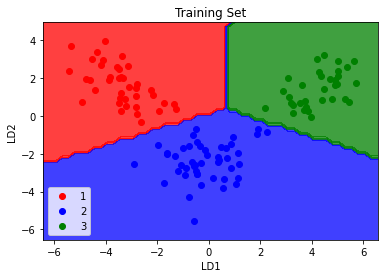

In [31]:
#Visualising Training Set Results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start = X_set[: , 0].min()-1 , stop = X_set[: , 0].max() +1 , step = 0.25),
    np.arange(start = X_set[: , 1].min()-1 , stop = X_set[: , 1].max() +1 , step = 0.25),
    )
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel() , X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red' ,'blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
               c = ListedColormap(('red', 'blue', 'green'))(i), label = j)
    
plt.title("Training Set")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()
    
    
    
    

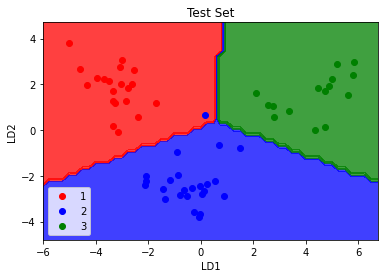

In [32]:
#Visualising Tes Set Results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start = X_set[: , 0].min()-1 , stop = X_set[: , 0].max() +1 , step = 0.25),
    np.arange(start = X_set[: , 1].min()-1 , stop = X_set[: , 1].max() +1 , step = 0.25),
    )
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel() , X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red' ,'blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
               c = ListedColormap(('red', 'blue', 'green'))(i), label = j)
    
plt.title("Test Set")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()